In [38]:
import matplotlib.pyplot as plt
import json
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 10,5

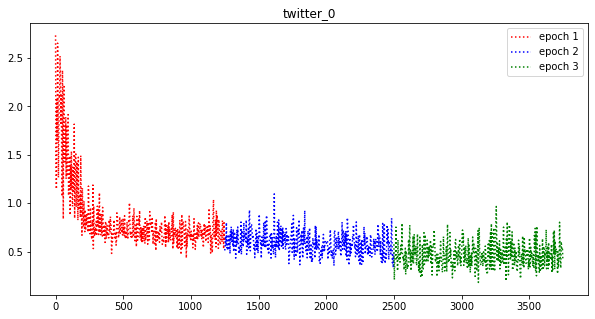

accuracy: 0.7724, macro_f1: 0.7796281951975214


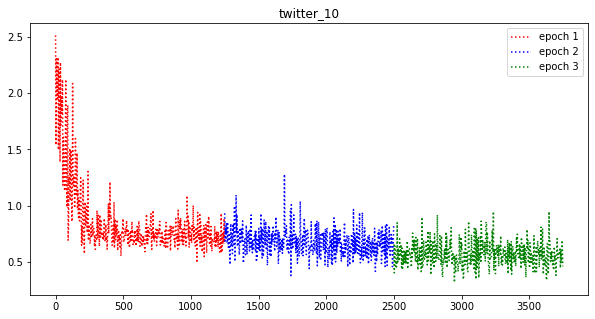

accuracy: 0.725, macro_f1: 0.7625625971334831


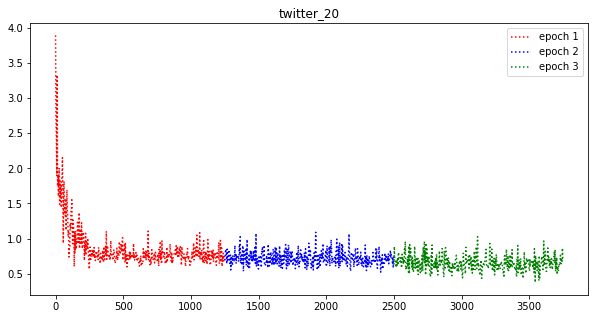

accuracy: 0.7204, macro_f1: 0.734624145785877


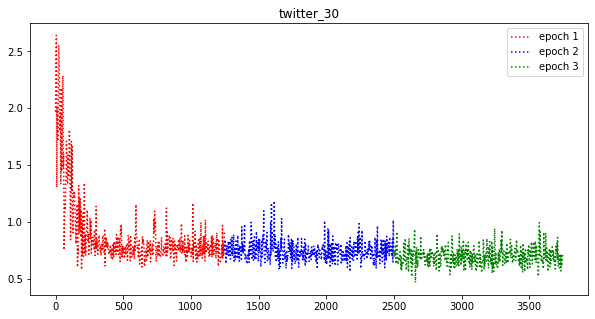

accuracy: 0.635, macro_f1: 0.488652283552816


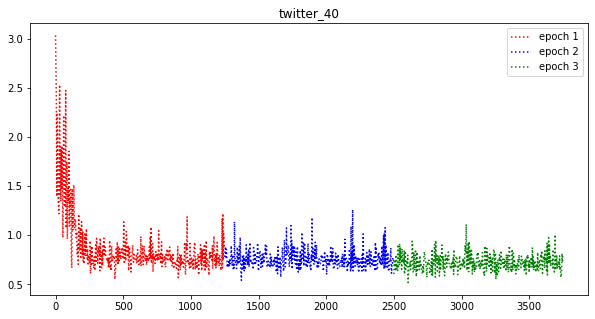

accuracy: 0.5316, macro_f1: 0.6706047819971871


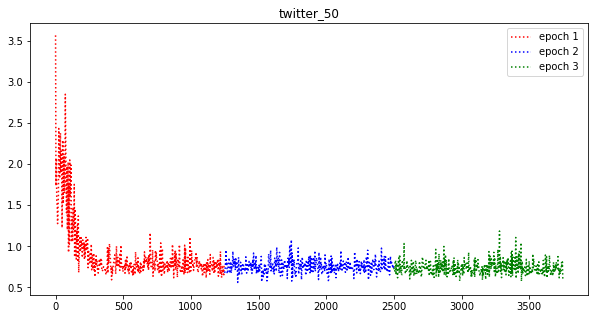

accuracy: 0.485, macro_f1: 0.32714920303109485


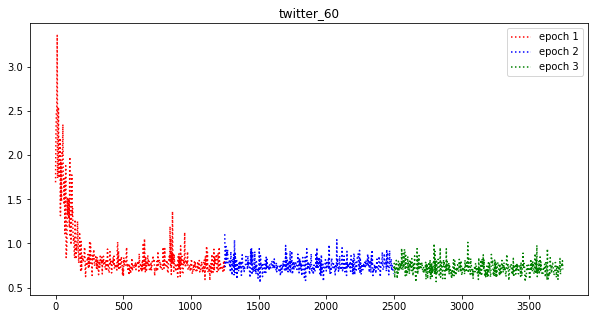

accuracy: 0.4552, macro_f1: 0.34988066825775654


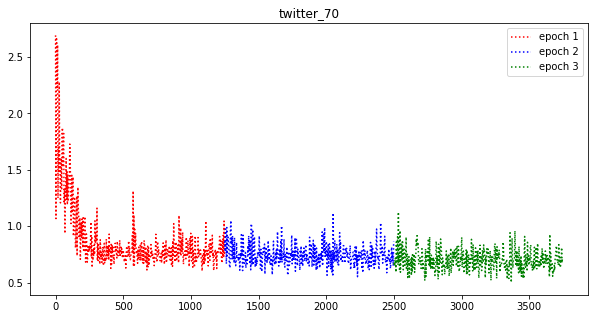

accuracy: 0.3288, macro_f1: 0.39640287769784177


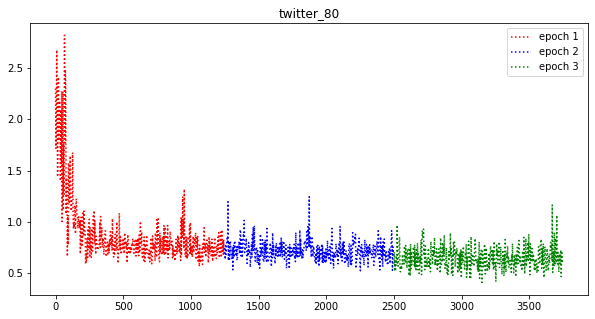

accuracy: 0.2848, macro_f1: 0.21094439541041482


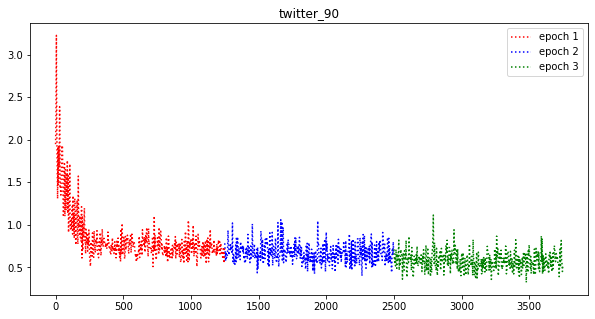

accuracy: 0.2496, macro_f1: 0.279293123319247


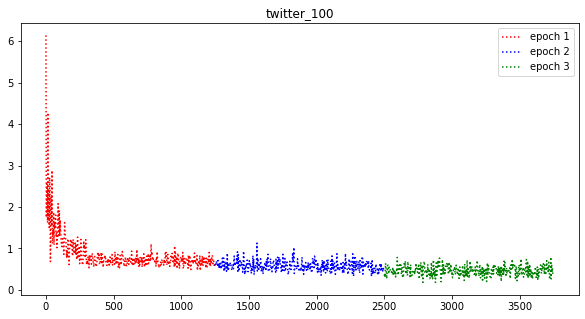

accuracy: 0.2288, macro_f1: 0.21753246753246752


In [20]:
def plot_loss(data_path):
    with open(data_path) as json_file:
        data = json.load(json_file)
        plt.title(data['name'])
        colors = ['r','b','g']
        for n,e in enumerate(list(data.keys())[1:-2]):
            xdata = []
            ydata = []
            for i,b in enumerate(data[e]):
                if(i % 3 == 0):
                    xdata.append(i + len(data[e])*n)
                    ydata.append(b['batch {}'.format(i)])
            plt.plot(xdata, ydata, ':',c=colors[n], label=e)
        plt.legend()
        plt.show()
        print('accuracy: {}, macro_f1: {}'.format(data['accuracy'], data['macro_f1']))
        
for i in range(0, 101, 10):
    plot_loss('../logs/twitter-cnn/twitter_{}.json'.format(i))

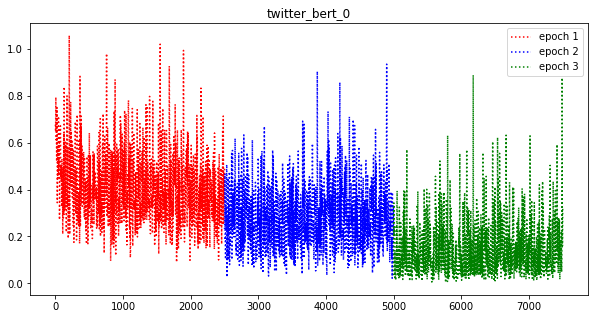

accuracy: 0.8358, macro_f1: 0.8355697977168035


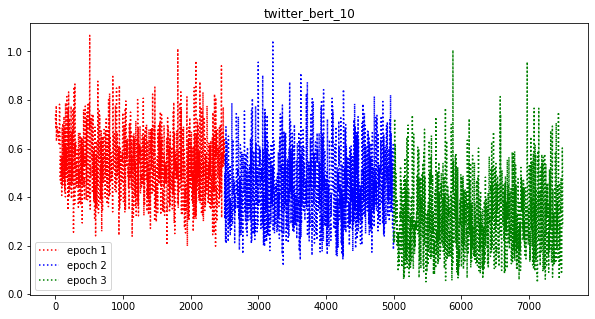

accuracy: 0.8256, macro_f1: 0.8279400157853197


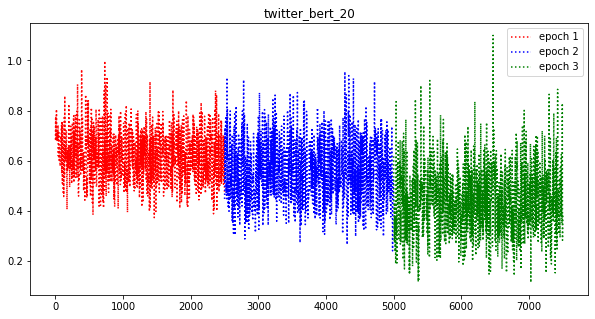

accuracy: 0.8106, macro_f1: 0.8265250045795933


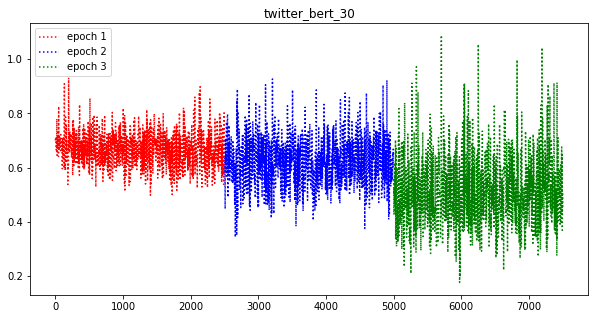

accuracy: 0.8068, macro_f1: 0.8004132231404958


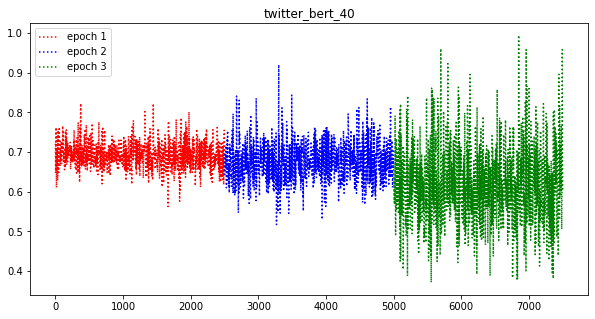

accuracy: 0.7546, macro_f1: 0.7397667020148462


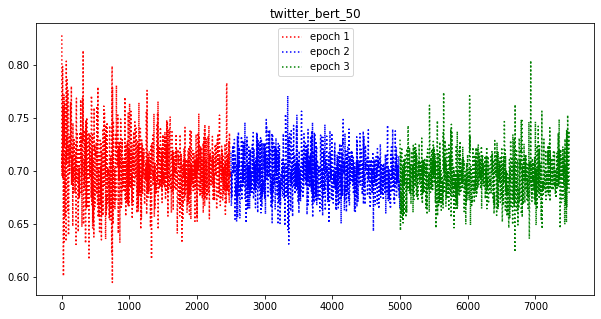

accuracy: 0.4818, macro_f1: 0.5950929832786374


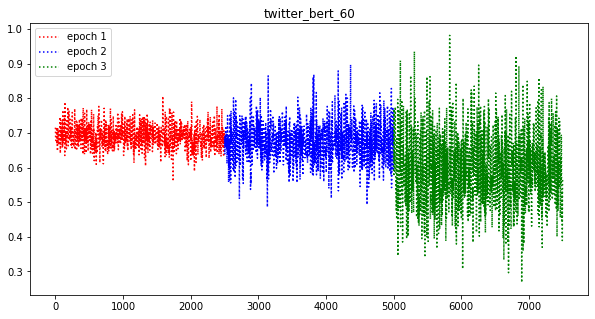

accuracy: 0.2598, macro_f1: 0.3799631429050092


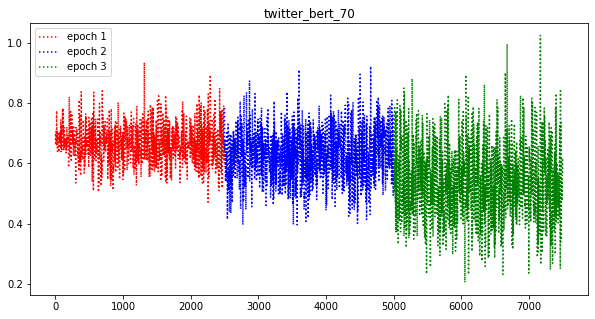

accuracy: 0.2016, macro_f1: 0.18828792191947946


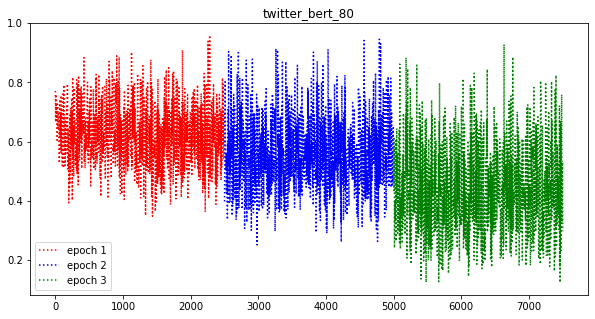

accuracy: 0.1766, macro_f1: 0.18102247861547643


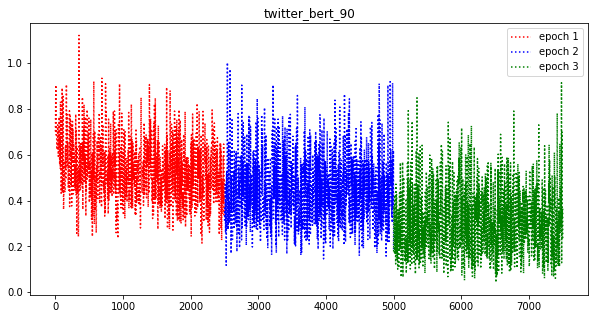

accuracy: 0.1696, macro_f1: 0.15644047135310848


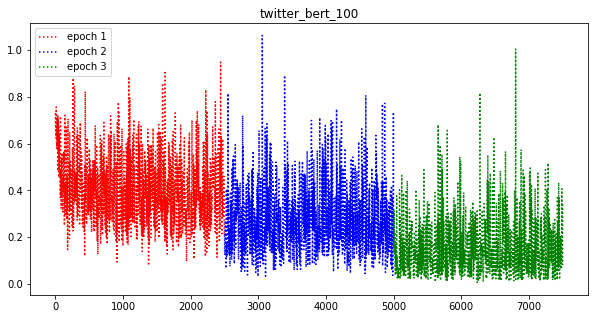

accuracy: 0.1632, macro_f1: 0.17605356439543127


In [19]:
for i in range(0, 101, 10):
    plot_loss('../logs/twitter-bert/twitter_bert_{}.json'.format(i))

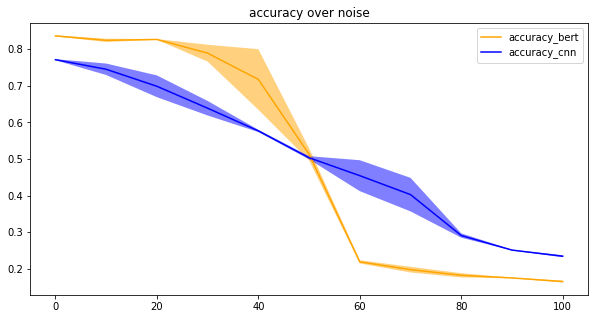

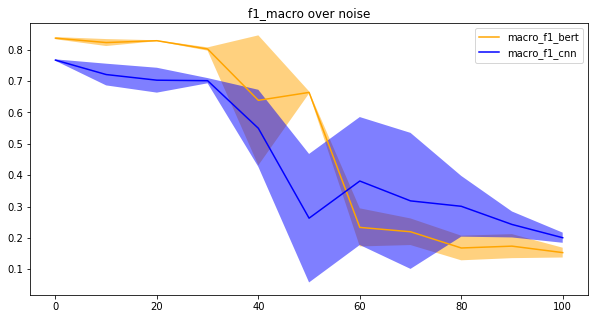

In [65]:
plt.title('accuracy over noise')

def plot_accuracy_3(base_path):
    xdata = []
    acc = []
    f1 = []
    acc_std = []
    f1_std = []
    for i in range(0, 101, 10):
        xdata.append(i)
        ypts = []
        for j in range(1,4):
            data_path = base_path + '_{}_{}.json'.format(i,j)
            with open(data_path) as json_file:
                data = json.load(json_file)
                ypts.append([data['accuracy'], data['macro_f1']])
        accs = [pt[0] for pt in ypts]
        f1s = [pt[1] for pt in ypts]
        
        acc.append(sum(accs)/len(accs))
        f1.append(sum(f1s)/len(f1s))
        
        acc_std.append(np.std(accs))
        f1_std.append(np.std(f1s))
    return xdata,acc,f1,acc_std,f1_std

b_xdata,b_acc,b_f1,b_std_acc,b_std_f1 = plot_accuracy_3('../logs/twitter-bert/twitter_bert')

c_xdata,c_acc,c_f1,c_std_acc,c_std_f1 = plot_accuracy_3('../logs/twitter-cnn/twitter_cnn')

b_low_acc = [a-s for a,s in zip(b_acc,b_std_acc)]
b_high_acc = [a+s for a,s in zip(b_acc,b_std_acc)]

c_low_acc = [a-s for a,s in zip(c_acc,c_std_acc)]
c_high_acc = [a+s for a,s in zip(c_acc,c_std_acc)]

plt.fill_between(xdata, b_low_acc, b_high_acc, facecolor='orange', alpha=0.5)
plt.plot(b_xdata, b_acc, c='orange',label='accuracy_bert')

plt.fill_between(xdata, c_low_acc, c_high_acc, facecolor='blue', alpha=0.5)
plt.plot(c_xdata, c_acc, c='blue',label='accuracy_cnn')

plt.legend()
plt.show()

b_low_f1 = [f-s for f,s in zip(b_f1, b_std_f1)]
b_high_f1 = [f+s for f,s in zip(b_f1, b_std_f1)]
c_low_f1 = [f-s for f,s in zip(c_f1, c_std_f1)]
c_high_f1 = [f+s for f,s in zip(c_f1, c_std_f1)]

plt.title('f1_macro over noise')
plt.fill_between(xdata, b_low_f1, b_high_f1, facecolor='orange', alpha=0.5)
plt.plot(b_xdata, b_f1, c='orange',label='macro_f1_bert')

plt.fill_between(xdata, c_low_f1, c_high_f1, facecolor='blue', alpha=0.5)
plt.plot(c_xdata, c_f1, c='blue',label='macro_f1_cnn')

plt.legend()
plt.show()